# Zeitlicher Ablauf der Datenerfassung

Einleitung
 ------
In diesem Notebook ging es darum den zeitlichen Ablauf der Datenerfassung darzustellen.
Dabei werden als zeitliche Kennzahlen die arithmetischen Mittelwerte genutzt sowie die min und maximal Zeitwerte.     
Die Daten werden mit einer Smartphone Android App erfasst [FMA](https://github.com/SandGreif/Fahrradwege-Monitoring-App).

<img src="../daten/abbildungen/mittelwerteZeitlicherAblaufT80.png" alr="Mittelwerte des zeitlichen Ablaufs der Datenerfassung. Zeitfenster Mittelwert t=80ms">
Abbildung 1: Zeitfenster Mittelwert t=80ms. Datensätze 15 bis 22

<img src="../daten/abbildungen/mittelwerteZeitlicherAblaufT500.png" alt=" Mittelwerte des zeitlichen Ablaufs der Datenerfassung. Zeitfenster Mittelwert t=500ms">
Abbildung 2: Zeitfenster Mittelwert t=500ms. Datensätze 26 bis 27

<img src="../daten/abbildungen/mittelwerteZeitlicherAblaufTDynamischesZeitfenster.png" alt="Mittelwerte des zeitlichen Ablaufs der Datenerfassung: Dynamisches Zeitfenster Mittelwert t=243,58ms">
Abbildung 3: Dynamisches Zeitfenster Mittelwert $t=243,58ms$. Datensätze 28 bis 29

Auf Abb. 2 - 3 wurde noch vom Ende des Zeitfensters bis zum Stopp der Messwerterfassung die nicht optimierte Version verwendet. Also der Zeitabstand ist doppelt so lang wie nötig zwischen dem fertig aufgenommenen Bild bis zum Stopp der Messwerterfassung. Außerdem ist die Dauer t des y Wert "Lesen und Schreiben der Daten" eine Schätzung auf Abb. 1-3. Erst bei späteren Datenerfassungen wird das tatsächliche Ende abgespeichert.

In [1]:
import pandas
import os
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

In [2]:
featuresDf = pandas.read_csv(filepath_or_buffer="../daten/merkmale_datensatz_37_bis_42/merkmale.csv")

In [3]:
featuresDf.describe()

,Zeitstempel in Unixzeit,Breitengrad,Laengengrad,Geschwindigkeit in km/h,Anzahl der Messwerte,Start des Zeitfensters in ns seit Start der JVM,Zeitstempel Messwertdaten anfordern in Unixzeit,Start der Messwerterfassung in ns seit Start der JVM,Erster Zeitstempel der Teilliste in ns seit Start der JVM,Start der Belichtung in ns seit Start der JVM,Belichtungszeit in ns,Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM,Speicherzeitpunkt der Merkmale in Unixzeit
count,9.800000e+02,980.000000,980.000000,980.000000,980.000000,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02
mean,1.527679e+12,53.611860,10.141444,15.920633,29.334694,6.720544e+13,1.527679e+12,6.709912e+13,6.720457e+13,6.720556e+13,4.880671e+06,6.720600e+13,1.527679e+12
std,1.768921e+05,0.001924,0.004416,4.125503,8.607324,1.769035e+11,1.768028e+05,1.732570e+11,1.769657e+11,1.768912e+11,5.136466e+06,1.768025e+11,1.767992e+05
min,1.527678e+12,53.608086,10.136191,5.507999,15.000000,6.687435e+13,1.527678e+12,6.687418e+13,6.687418e+13,6.687468e+13,8.641290e+05,6.687601e+13,1.527678e+12
25%,1.527678e+12,53.610184,10.137041,13.392000,24.000000,6.705460e+13,1.527678e+12,6.687418e+13,6.705377e+13,6.705470e+13,1.507630e+06,6.705511e+13,1.527678e+12
50%,1.527679e+12,53.612270,10.140607,15.336000,28.000000,6.721652e+13,1.527679e+12,6.708007e+13,6.721555e+13,6.721666e+13,2.160323e+06,6.721726e+13,1.527679e+12
75%,1.527679e+12,53.613780,10.145403,18.252000,33.000000,6.737046e+13,1.527679e+12,6.729175e+13,6.736986e+13,6.737054e+13,7.528958e+06,6.737064e+13,1.527679e+12
max,1.527679e+12,53.613960,10.149709,27.972000,81.000000,6.749401e+13,1.527679e+12,6.729175e+13,6.749239e+13,6.749415e+13,2.999632e+07,6.749456e+13,1.527679e+12


In [106]:
featuresDf.columns

Index(['Zeitstempel in Unixzeit', 'Breitengrad', 'Laengengrad',
       'Geschwindigkeit in km/h', 'Z-Achse Beschleunigungswerte in m/s^2',
       'Y-Achse Beschleunigungswerte in m/s^2', 'Nick Messwerte in rad',
       'Zeitstempel der Messwerte in ns', 'Anzahl der Messwerte',
       'Start des Zeitfensters in ns seit Start der JVM',
       'Zeitstempel Messwertdaten anfordern in Unixzeit',
       'Start der Messwerterfassung in ns seit Start der JVM',
       'Erster Zeitstempel der Teilliste in ns seit Start der JVM',
       'Start der Belichtung in ns seit Start der JVM',
       'Belichtungszeit in ns',
       'Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM',
       'Speicherzeitpunkt der Merkmale in Unixzeit'],
      dtype='object')

In [5]:
# Mittelwert der Belichtungszeit aller Aufnahmen umgerechnet in ms
meanExposureTime = featuresDf['Belichtungszeit in ns'].mean() / 1000000
meanExposureTime

13.646686002065689

In [6]:
# Mittelwert Anzahl der Messwerte pro Merkmal
featuresDf['Anzahl der Messwerte'].mean()

30.292294980375956

In [9]:
# Dynamisches Zeitfenster Mittelwert
timeframe = featuresDf['Geschwindigkeit in km/h'].mean() 
# umrechnung km/h in m/s
timeframe = timeframe/3.6
timeframe = 1/timeframe 
timeframe = timeframe * 1000
timeframe

240.6286066268157

In [8]:
# Dauer des Zeitfensters in ms
timeframe = 80

In [10]:
# Mittelwert vom Ende des Zeitfensters in ms bis zum Stop der Datenerfassung in ms 
meanStopMeasurementToEndTimeframeTime =(featuresDf['Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM'] 
                          - (featuresDf['Start des Zeitfensters in ns seit Start der JVM'] + (timeframe * 1000000))).mean()
meanStopMeasurementToEndTimeframeTime = meanStopMeasurementToEndTimeframeTime / 1000000
meanStopMeasurementToEndTimeframeTime

20.267458024108308

In [80]:
# Mittelwert vom Aufruf das die Aufnahme fertig ist bis zum Stopp der Messwerterfassung in ms
meanStopMeasurementTime = (featuresDf['Zeitstempel in Unixzeit']-featuresDf['Stopp der Messwerterfassung in Unixzeit']).mean()
meanStopMeasurementTime

-372307643967390.19

In [24]:
# Mittelwert vom Start der Messwert Datenerfassung bis zum Start des Zeitfensters in ms
meanStartMeasurementDataTime = featuresDf['Start des Zeitfensters in ns seit Start der JVM'].mean() - featuresDf['Start der Messwerterfassung in ns seit Start der JVM'].mean()
meanStartMeasurementDataTime = meanStartMeasurementDataTime / 1000000
meanStartMeasurementDataTime

16811.5136484375

Bei der Berechnung des zeitlichen Abstandes von erfassten Bildaufnahmen ist zu beachten, dass die verwendete Daten aus einer Datenerfassungsserie stammen also einem Datensatz. Als Kennwert wird nämlich die Zeitstempel Spalte aus der Merkmal CSV Datei genutzt. Der Zeitstempel gibt an, wann das Bild aufgenommen wurde in Unixzeit. Zwischen zwei erfassten Datensätzen ist meistens einige Zeit mehr vergangen. Deshalb wird für die Berechnung ein Datensatz genutzt. Der angegebene Zeitwert wird in dem Notebook frameRate berechnet in dem Ordner datenanalyse. 

In [129]:
# Mittelwert des Abstandes bis das nächste Bild aufgenommen wurde von den Datensatz 15 mit 305.906 ms aufgerundet auf 306 Ms.
meanCaptureImagesTime = 290

In [130]:
# In dieser Zelle werden die Vielfachen der Mittelwerte in Listen angehängt, um exemplarisch
# den weiteren Verlauf einer Datenserie mit gemittelten Zeitwerten in einem Diagram darzustellen.

# Anzahl der Bilder
numberImages = 2
imageCounter = 1
meanExposureOffset = (timeframe - meanExposureTime) / 2
# Listen die mit den entsprechenden Vielfachen der Zeitangaben gefüllt werden

# Gibt mittlere Zeitwerte an zu welchem ein Bild bereit ist zum abspeichern 
meanCaptureImagesTimeList = []
# Start der Zeitfenster 
startTimeFrameList = []
startExposureTimeList = []
exposureTimeList = []
while imageCounter <= numberImages:
    meanCaptureImagesTimeList.append(meanCaptureImagesTime * imageCounter)
    startTimeFrameList.append(meanCaptureImagesTimeList[imageCounter-1] - meanStopMeasurementToEndTimeframeTime - timeframe)
    startExposureTimeList.append(startTimeFrameList[imageCounter-1] + meanExposureOffset)
    exposureTimeList.append(startExposureTimeList[imageCounter-1] + meanExposureTime)
    imageCounter = imageCounter + 1

In [131]:
meanCaptureImagesTimeList[0] - meanStopMeasurementToEndTimeframeTime - timeframe

138.45946163713478

In [132]:
meanStopMeasurementToEndTimeframeTime

71.540538362865234

In [133]:
meanStopMeasurementToEndTimeframeTime

71.540538362865234

In [134]:
# Offset damit t bei 0 ms beginnt
zeroOffset = startTimeFrameList[0]-meanStartMeasurementDataTime
zeroOffset

77.379605590259786

In [135]:
startTimeFrameList[0]

138.45946163713478

In [136]:
startTimeFrameList[0]

138.45946163713478

In [137]:
measuredDataPerMs = timeframe / featuresDf['Anzahl der Messwerte'].mean()
print(measuredDataPerMs)

4.13020764111


In [138]:
(meanCaptureImagesTimeList[0] + meanStopMeasurementTime - zeroOffset) / measuredDataPerMs

51.984893363228807

In [139]:
meanStartMeasurementDataTime

61.079856046875001

In [140]:
meanCaptureImagesTimeList[1] + meanStopMeasurementTime - zeroOffset

504.70840379115327

In [141]:
meanCaptureImagesTimeList[0] + meanStopMeasurementTime - zeroOffset

214.7084037911533

In [142]:
timeframe

80

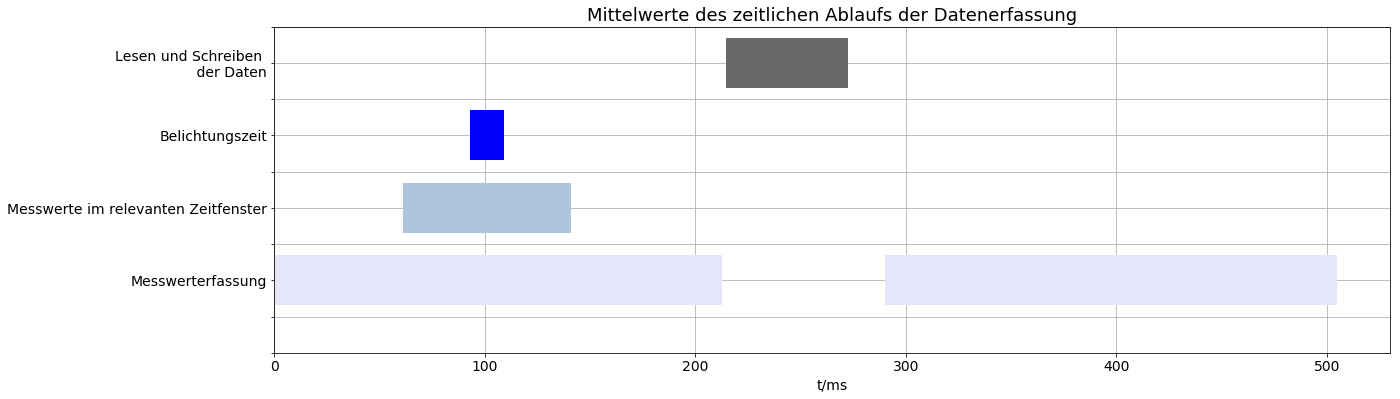

In [143]:
# Plot mit Gantt-Diagram
fig, ax = plt.subplots(figsize=(20,6))
i = 0
while i < numberImages:
    if i == 0:
        ax.hlines(xmin=startTimeFrameList[i]-meanStartMeasurementDataTime - zeroOffset,
                  xmax=startTimeFrameList[i]-zeroOffset + meanStopMeasurementToEndTimeframeTime + timeframe,y=1, colors="lavender", lw=50)
        ax.hlines(xmin=startTimeFrameList[i] - zeroOffset,xmax=startTimeFrameList[i]+ timeframe - zeroOffset,y=2, colors="lightsteelblue", lw=50)
        ax.hlines(xmin=startExposureTimeList[i] - zeroOffset,xmax=exposureTimeList[i] - zeroOffset,y=3, colors="blue", lw=50)
        ax.hlines(xmin=meanCaptureImagesTimeList[i] + meanStopMeasurementTime - zeroOffset,xmax=meanCaptureImagesTimeList[i] + 60 - zeroOffset,
                  y=4, colors="dimgrey", lw=50)
    else:
        ax.hlines(xmin=startTimeFrameList[i]-meanStartMeasurementDataTime - zeroOffset,xmax=meanCaptureImagesTimeList[i] + meanStopMeasurementTime - zeroOffset,
                  y=1, colors="lavender", lw=50)

    i = i + 1

def formatter(y, pos):
    if y == 1:
        return 'Messwerterfassung'
    if y == 2:
        return 'Messwerte im relevanten Zeitfenster'
    if y == 3:
        return 'Belichtungszeit'
    if y == 4:
        return 'Lesen und Schreiben \n der Daten'
    else:
        return ''

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
plt.xlabel('t/ms',fontsize=14)
plt.title('Mittelwerte des zeitlichen Ablaufs der Datenerfassung',fontsize=18)
plt.grid()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(0,)#startTimeFrameList[1]-meanStartMeasurementDataTime-60)
plt.ylim(0,4.5)
plt.rcParams["legend.fontsize"] = 14

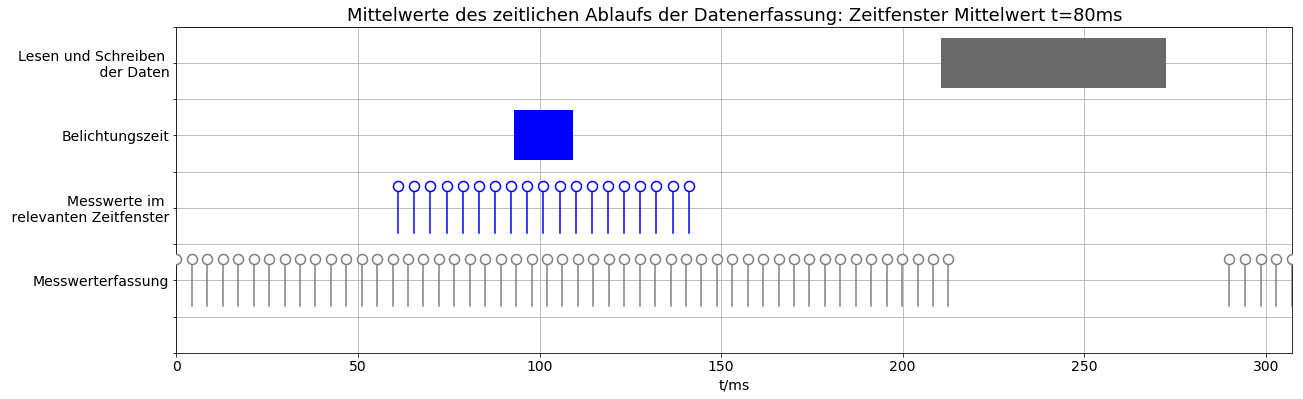

In [146]:
# Plot mit stem Diagrammen
fig, ax = plt.subplots(figsize=(20,6))
i = 0
while i < numberImages:
    if i == 0:
        # Messwerterfassung
        x = np.linspace(startTimeFrameList[i]-meanStartMeasurementDataTime - zeroOffset,
                        startTimeFrameList[i]-zeroOffset + meanStopMeasurementToEndTimeframeTime + timeframe, 
                        int((meanStartMeasurementDataTime  + meanStopMeasurementToEndTimeframeTime + timeframe) / measuredDataPerMs))
        (markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 1.3), linefmt='C7-', basefmt='None', bottom=0.65, markerfmt='wo')
        plt.setp(stemlines, linestyle="-", color="C7", linewidth=1.5)
        plt.setp(markers, markeredgecolor='C7', markersize=10, markeredgewidth=1.5, zorder=3)
        # Zeitfenster
        x = np.linspace(startTimeFrameList[i] - zeroOffset,startTimeFrameList[i]+timeframe - zeroOffset, 
                        int(featuresDf['Anzahl der Messwerte'].mean()))
        (markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 2.3), 'b-', basefmt='None', bottom=1.65, markerfmt='wo')
        plt.setp(stemlines, linestyle="-", color="b", linewidth=1.5)
        plt.setp(markers, markeredgecolor='b', markersize=10, markeredgewidth=1.5, zorder=3)
        # Belichtungszeit
        ax.hlines(xmin=startExposureTimeList[i] - zeroOffset,xmax=exposureTimeList[i] - zeroOffset,y=3, colors="blue", lw=50)
        # Lesen und schreiben der Daten
        ax.hlines(xmin=meanCaptureImagesTimeList[i] - meanStopMeasurementTime - zeroOffset,xmax=meanCaptureImagesTimeList[i] + 60 - zeroOffset,
              y=4, colors="dimgrey", lw=50)
    else:
        # Messwerterfassung
        x = np.linspace(startTimeFrameList[i]-meanStartMeasurementDataTime - zeroOffset,
                        meanCaptureImagesTimeList[i] + meanStopMeasurementTime - zeroOffset, 
                        int((meanCaptureImagesTimeList[0] + meanStopMeasurementTime - zeroOffset) / measuredDataPerMs))
        (markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 1.3), linefmt='C7-', basefmt='None', bottom=0.65, markerfmt='wo')
        plt.setp(stemlines, linestyle="-", color="C7", linewidth=1.5)
        plt.setp(markers, markeredgecolor='C7', markersize=10, markeredgewidth=1.5, zorder=3)
    i = i + 1

def formatter(y, pos):
    if y == 1:
        return 'Messwerterfassung'
    if y == 2:
        return 'Messwerte im \n relevanten Zeitfenster'
    if y == 3:
        return 'Belichtungszeit'
    if y == 4:
        return 'Lesen und Schreiben \n der Daten'
    else:
        return ''

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
plt.xlabel('t/ms',fontsize=14)
plt.title('Mittelwerte des zeitlichen Ablaufs der Datenerfassung: Zeitfenster Mittelwert t=80ms',fontsize=18)
plt.grid()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(0,startTimeFrameList[1]-meanStartMeasurementDataTime - 60)
plt.ylim(0,4.5)
plt.rcParams["legend.fontsize"] = 14
plt.savefig('mittelwerteZeitlicherAblaufT80')

### Berechnung des Diagramms der Mittelwerte des zeitlichen Ablaufs mit dynamischen Zeitfenster

In [3]:
# Berechnung des Diagramms der Mittelwerte des zeitlichen Ablaufs mit dynamischen Zeitfenster
# Mittelwert der Belichtungszeit aller Aufnahmen umgerechnet in ms
meanExposureTime = featuresDf['Belichtungszeit in ns'].mean() / 1000000
# Mittelwert Anzahl der Messwerte pro Merkmal
featuresDf['Anzahl der Messwerte'].mean()
# Dynamisches Zeitfenster Mittelwert
timeframe = featuresDf['Geschwindigkeit in km/h'].mean() 
# umrechnung km/h in m/s
timeframe = timeframe/3.6
timeframe = 1/timeframe 
timeframe = timeframe * 1000
timeframe

229.12041524780099

In [4]:
# Mittelwert vom Ende des Zeitfensters in ms bis zum Stop der Datenerfassung in ms 
meanStopMeasurementToEndTimeframeTime =(featuresDf['Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM'] 
                          - (featuresDf['Start des Zeitfensters in ns seit Start der JVM'] + ((1/(featuresDf['Geschwindigkeit in km/h']/3.6)) * 1000000000))).mean()
meanStopMeasurementToEndTimeframeTime = meanStopMeasurementToEndTimeframeTime / 1000000
meanStopMeasurementToEndTimeframeTime

5.9184573568123309

In [5]:
df =featuresDf[(featuresDf['Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM'] 
                          - (featuresDf['Start des Zeitfensters in ns seit Start der JVM'] + ((1/(featuresDf['Geschwindigkeit in km/h']/3.6)) * 1000000000)))/1000000 < 1]
df

,Zeitstempel in Unixzeit,Anzahl der Messwerte,Belichtungszeit in ns,Breitengrad,Erster Zeitstempel der Teilliste in ns seit Start der JVM,Genauigkeit der Geschwindigkeit speedAccuracyMetersPerSecond,Geschwindigkeit in km/h,Laengengrad,Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM,Lokations Zeitstempel in Unixzeit,...,Start der Messwerterfassung in ns seit Start der JVM,Start des Zeitfensters in ns seit Start der JVM,Unnamed: 0,Varianz Nick in rad,Varianz Y-Achse Beschleunigung in m/s^2,Varianz Z-Achse Beschleunigung in m/s^2,Y-Achse Beschleunigungswerte in m/s^2,Z-Achse Beschleunigungswerte in m/s^2,Zeitstempel Messwertdaten anfordern in Unixzeit,Zeitstempel der Messwerte in ns
1,1527868007062,57,10001839,53.613610,22031340872852,NaN,7.668000,10.137870,22032668148100,NaN,...,22031252922339,22032202822791,NaN,0.02706,2.12653,2.27408,-0.68937 -0.3072 0.22672 -0.23486 -0.50454 0.8...,0.13393 0.1724 -0.1907 -0.76339 -0.43661 -0.85...,1527868007198,1573109 9571422 17568122 25562580 33557718 415...
3,1527868008094,64,9229638,53.613605,22032612176102,NaN,6.876000,10.137904,22033731560658,NaN,...,22031252922339,22033211804555,NaN,0.04734,3.60241,4.92172,1.15419 -0.14522 -0.14174 -2.98252 -2.96466 0....,0.28562 -0.34338 -0.34027 1.1919 1.19167 0.484...,1527868008261,38414 8034020 16028740 24026429 32022295 40016...
4,1527868008632,64,10001839,53.613605,22033115896485,NaN,6.876000,10.137904,22034267264975,NaN,...,22031252922339,22033746025455,NaN,0.05794,6.33643,4.62006,0.27816 0.28116 -6.46297 -5.15971 -4.25605 0.3...,3.80124 3.7925 7.87461 5.54547 3.35539 2.03004...,1527868008795,1523393 9520041 17517261 25510106 33506024 414...
6,1527868009570,66,10001839,53.613605,22034115348992,NaN,6.660000,10.137905,22035210755505,NaN,...,22031252922339,22034672812295,NaN,0.06760,4.40301,3.98775,-2.12865 -0.46978 -0.47613 -1.55128 -1.55444 0...,1.66988 0.07955 0.07909 0.00195 0.00107 -0.229...,1527868009742,2241237 10240905 18230572 26232324 34230273 42...
7,1527868010037,65,10001839,53.613605,22034579108818,NaN,6.660000,10.137905,22035674508382,NaN,...,22031252922339,22035140500295,NaN,0.02382,1.68021,1.92288,0.30583 2.15774 -1.0275 -2.2737 0.08535 3.5510...,1.69395 -0.79455 0.10499 0.18056 -1.21573 -0.3...,1527868010208,6298074 14294305 22289181 30284839 38272996 46...
8,1527868010484,58,9229638,53.613620,22035050848396,NaN,7.487999,10.137921,22036082286552,NaN,...,22031252922339,22035605061043,NaN,0.03432,2.29379,3.40227,-1.96812 -1.90816 1.7652 0.5535 -0.18171 2.180...,1.62401 2.02127 -0.54524 0.81201 -0.12737 -2.6...,1527868010616,5483641 13478882 21474695 29461760 37457573 45...
10,1527868011303,43,7979408,53.613640,22035922373194,NaN,9.900000,10.137924,22036857856897,NaN,...,22031252922339,22036499419590,NaN,0.03673,3.25352,2.67206,2.83543 1.47011 0.54522 2.07034 1.72495 1.7241...,0.05281 0.53124 -1.64818 -4.33929 -0.85101 -0....,1527868011390,6632751 14628877 22624847 30611181 38613662 46...
11,1527868011638,44,7979408,53.613640,22036322145185,NaN,9.900000,10.137924,22037193670713,NaN,...,22031252922339,22036833593590,NaN,0.07181,5.87684,4.17096,1.44611 -3.5122 -2.30346 -0.98125 1.48422 -0.5...,-0.48554 2.24723 -0.18665 -0.74243 -1.46908 -2...,1527868011723,279929 8272410 16270098 24263307 32257976 4024...
12,1527868011987,43,8963045,53.613640,22036657959990,NaN,9.900000,10.137924,22037521493870,NaN,...,22031252922339,22037167076772,NaN,0.03100,2.80546,2.18450,0.29282 -2.2659 -1.26317 1.97426 -2.27147 2.49...,0.65961 3.21954 2.60118 1.96495 4.59879 -1.699...,1527868012057,2612541 10606844 18602138 26593941 34599130 42...
13,1527868012444,43,10001839,53.613663,22036985787106,NaN,9.936000,10.137921,22037993233187,NaN,...,22031252922339,22037634916143,NaN,0.03819,3.50615,4.03983,-2.84235 -1.40182 1.51094 -0.68845 -1.45271 1....,0.32927 -2.25211 -1.2732 0.33456 -0.98547 -2.8...,1527868012525,6511184 14503822 22500312 30490605 38494231 46...


In [6]:
((df['Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM'] - (df['Start des Zeitfensters in ns seit Start der JVM'] + 
                             ((1/(df['Geschwindigkeit in km/h']/3.6)) * 1000000000)))/1000000).min() 

-54.9440948203125

In [7]:
# ist ausreichend Zeit zwischen Start Zeitstempel und Stopp Zeitstempel der Teilliste vorhanden, dass das Zeitfenster t noch dazwischen passt?
notEnoughTimeStartStopTimestamps = featuresDf[(featuresDf['Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM'] - featuresDf['Start des Zeitfensters in ns seit Start der JVM']) < ((1/(featuresDf['Geschwindigkeit in km/h']/3.6)) * 1000000000)]
((notEnoughTimeStartStopTimestamps['Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM'] - notEnoughTimeStartStopTimestamps['Start des Zeitfensters in ns seit Start der JVM'])- ((1/(notEnoughTimeStartStopTimestamps['Geschwindigkeit in km/h']/3.6)) * 1000000000))/1000000

1         -4.158259
3         -3.804106
4         -2.320689
6         -2.597331
7         -6.532454
8         -3.543760
10        -5.199057
11        -3.559241
12        -9.219266
13        -4.001797
14        -2.244294
15        -2.544485
16        -0.027964
18        -0.657545
21        -2.941795
22        -6.901838
23        -7.995564
24        -9.130020
25        -1.718098
28        -3.035512
29        -3.685311
30        -3.402105
31        -3.027035
32        -2.862147
36        -3.451341
38        -3.732010
42        -1.411513
44        -3.301372
46        -0.368202
48        -9.108789
            ...    
115731    -1.545022
115734    -0.963452
115735    -2.965353
115749    -7.503407
115752    -4.183333
115753    -2.560964
115754    -1.437614
115755    -4.806851
115756    -0.915044
115757    -2.904662
115758    -0.428487
115759    -1.524329
115763    -1.644139
115766    -2.239622
115767   -10.247692
115768    -5.239872
115769    -3.643835
115770    -6.462484
115771    -2.442500


In [8]:
featuresDf[(featuresDf['Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM'] - featuresDf['Start des Zeitfensters in ns seit Start der JVM']) > ((1/(featuresDf['Geschwindigkeit in km/h']/3.6)) * 1000000000)].iloc[0]

Zeitstempel in Unixzeit                                                                                   1527868006325
Anzahl der Messwerte                                                                                                 68
Belichtungszeit in ns                                                                                          10001839
Breitengrad                                                                                                     53.6136
Erster Zeitstempel der Teilliste in ns seit Start der JVM                                                22031252922339
Genauigkeit der Geschwindigkeit speedAccuracyMetersPerSecond                                                        NaN
Geschwindigkeit in km/h                                                                                           6.552
Laengengrad                                                                                                     10.1379
Letzter Zeitstempel der Messwerterfassun

In [9]:
((1/(featuresDf['Geschwindigkeit in km/h'].iloc[0]/3.6)) * 1000000000)

549450507.52056563

In [10]:
# Mittelwert des Abstandes bis das nächste Bild aufgenommen wurde 
meanCaptureImagesTime = 319

In [11]:
(((featuresDf['Start des Zeitfensters in ns seit Start der JVM'] - featuresDf['Start der Messwerterfassung in ns seit Start der JVM'])/ 1000000))


0           174.998980
1           949.900452
2          1484.656659
3          1958.882216
4          2493.103116
5          2952.188956
6          3419.889956
7          3887.577956
8          4352.138704
9          4787.063819
10         5246.497251
11         5580.671251
12         5914.154433
13         6381.993804
14         6716.054804
15         7032.071028
16         7533.278746
17         7900.943235
18         8234.779100
19         8769.280100
20         9146.307988
21         9580.589988
22         9986.644940
23        10387.518940
24        10788.432940
25        11197.875764
26        11632.148764
27        11959.256548
28        12426.963548
29        13001.903204
              ...     
115760    18413.656104
115761    18753.986024
115762    19021.641124
115763    19323.561547
115764    19638.165663
115765    20007.245433
115766    20274.409504
115767    20577.685161
115768    20844.530271
115769    21346.650504
115770    21936.275360
115771    22404.006360
115772    2

In [12]:
# Mittelwert vom Start der Messwert Datenerfassung bis zum Start des Zeitfensters in ms
# Hierbei ist das Problem, dass ab Datensatz 30 die Datenerfassung der Messwerte alle 100 Bilder neu gestartet wird
# Aus diesem Grund kann der Mittelwert nicht anschaulich dargestellt werden. Deshalb werden nur die Zeitabstände mit einer Dauer länger 
# als ein gegebener Grenzwert  betrachtet
meanStartMeasurementDataTime = (((featuresDf['Start des Zeitfensters in ns seit Start der JVM'] - featuresDf['Start der Messwerterfassung in ns seit Start der JVM'])/ 1000000))
meanStartMeasurementDataTime = meanStartMeasurementDataTime[meanStartMeasurementDataTime < 250]
meanStartMeasurementDataTime = meanStartMeasurementDataTime.mean()
meanStartMeasurementDataTime

195.89513240425535

In [13]:
measuredDataPerMs = timeframe / featuresDf['Anzahl der Messwerte'].mean()
measuredDataPerMs

7.7122270673470048

In [14]:
exposureOffset = (timeframe - meanExposureTime) / 2

In [15]:
# Mittelwert vom Aufruf das die Aufnahme fertig ist bis zum Stopp der Messwerterfassung in ms
meanStopMeasurementTime = (featuresDf['Zeitstempel Messwertdaten anfordern in Unixzeit'] - featuresDf['Zeitstempel in Unixzeit']).mean()
meanStopMeasurementTime

29.914759478366008

In [16]:
# Mittelwert Dauer von Lesen und Schreiben der Merkmale
meanWriteTime =  (featuresDf['Speicherzeitpunkt der Merkmale in Unixzeit'] - featuresDf['Zeitstempel in Unixzeit']).mean()
meanWriteTime

43.549270230589862

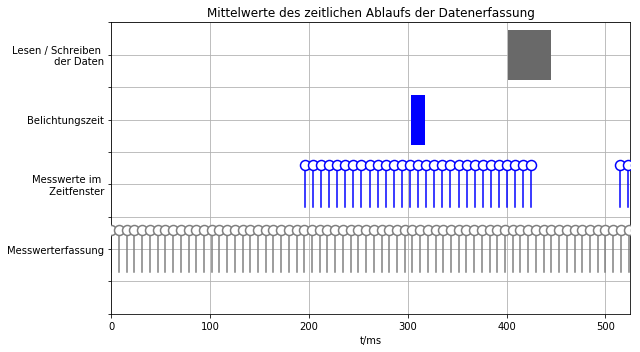

In [20]:
# Plot mit stem Diagrammen
fig, ax = plt.subplots(figsize=(9,5))
i = 0
numberImages = 2
while i < 2:
    if i == 0:
        # Messwerterfassung
        x = np.linspace(0,1000,int(1000/measuredDataPerMs))
        (markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 1.3), linefmt='C7-', basefmt='None', bottom=0.65, markerfmt='wo')
        plt.setp(stemlines, linestyle="-", color="C7", linewidth=1.5)
        plt.setp(markers, markeredgecolor='C7', markersize=10, markeredgewidth=1.5, zorder=3)
        # Zeitfenster
        x = np.linspace(meanStartMeasurementDataTime,meanStartMeasurementDataTime+timeframe, 
                        int(featuresDf['Anzahl der Messwerte'].mean()))
        (markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 2.3), 'b-', basefmt='None', bottom=1.65, markerfmt='wo')
        plt.setp(stemlines, linestyle="-", color="b", linewidth=1.5)
        plt.setp(markers, markeredgecolor='b', markersize=10, markeredgewidth=1.5, zorder=3)
       # Belichtungszeit
        ax.hlines(xmin=meanStartMeasurementDataTime + exposureOffset,
                   xmax=(meanStartMeasurementDataTime + exposureOffset + meanExposureTime ),
                   y=3, colors="blue", lw=50)
         # Lesen und schreiben der Daten
        ax.hlines(xmin=meanStartMeasurementDataTime+timeframe+meanStopMeasurementToEndTimeframeTime-meanStopMeasurementTime,
                  xmax=meanStartMeasurementDataTime+timeframe+meanStopMeasurementToEndTimeframeTime-meanStopMeasurementTime+meanWriteTime,
              y=4, colors="dimgrey", lw=50)
    else:
         # Nächste Bildaufnahme
         # Lesen und schreiben der Daten
        ax.hlines(xmin=meanCaptureImagesTime+meanStartMeasurementDataTime+timeframe+meanStopMeasurementToEndTimeframeTime-meanStopMeasurementTime,
                  xmax=meanCaptureImagesTime+meanStartMeasurementDataTime+timeframe+meanStopMeasurementToEndTimeframeTime-meanStopMeasurementTime+meanWriteTime,
              y=4, colors="dimgrey", lw=50)
        # Zeitfenster
        x = np.linspace(meanStartMeasurementDataTime+meanCaptureImagesTime,meanCaptureImagesTime+meanStartMeasurementDataTime+timeframe, 
                        int(featuresDf['Anzahl der Messwerte'].mean()))
        (markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 2.3), 'b-', basefmt='None', bottom=1.65, markerfmt='wo')
        plt.setp(stemlines, linestyle="-", color="b", linewidth=1.5)
        plt.setp(markers, markeredgecolor='b', markersize=10, markeredgewidth=1.5, zorder=3)
        # Belichtungszeit
        ax.hlines(xmin=meanStartMeasurementDataTime + exposureOffset+meanCaptureImagesTime,
                   xmax=meanStartMeasurementDataTime + exposureOffset + meanExposureTime+meanCaptureImagesTime,
                   y=3, colors="blue", lw=50)
    i = i + 1
def formatter(y, pos):
    if y == 1:
        return 'Messwerterfassung'
    if y == 2:
        return 'Messwerte im \n Zeitfenster'
    if y == 3:
        return 'Belichtungszeit'
    if y == 4:
        return 'Lesen / Schreiben \n der Daten'
    else:
        return ''

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
plt.xlabel('t/ms')
plt.title('Mittelwerte des zeitlichen Ablaufs der Datenerfassung')
plt.grid()
plt.tight_layout()
plt.xlim(0,525)
plt.ylim(0,4.5)
plt.savefig('mittelwerteZeitlicherAblaufDynamischesZeitfensterDatensatz37_42', dpi=300)

### Diagramm mit Minimal Zeitwerten: Dynamisches Zeitfenster

In [4]:
# Minimalwert der Belichtungszeit aller Aufnahmen umgerechnet in ms
minExposureTime = featuresDf['Belichtungszeit in ns'].min() / 1000000
minExposureTime

0.86412900000000004

In [5]:
# Dynamisches Zeitfenster Minimal Dauer
timeframe = featuresDf['Geschwindigkeit in km/h'].max() 
# umrechnung km/h in m/s
timeframe = timeframe/3.6
timeframe = 1/timeframe 
timeframe = timeframe * 1000
timeframe

128.70012870012872

In [6]:
# Mittelwert Anzahl der Messwerte
meanTimeframeTime = featuresDf['Geschwindigkeit in km/h'].mean() 
meanTimeframeTime = meanTimeframeTime/3.6
meanTimeframeTime = 1/meanTimeframeTime 
meanTimeframeTime = meanTimeframeTime * 1000
measuredDataPerMs = meanTimeframeTime / featuresDf['Anzahl der Messwerte'].mean()
measuredDataPerMs

7.708335662948369

In [7]:
# Minimalwert Anzahl der Messwerte pro Zeitfenster
minMeasuredDataPerMs  = timeframe / measuredDataPerMs
minMeasuredDataPerMs

16.696227866509652

In [8]:
# Minimalwert vom Ende des Zeitfensters in ms bis zum Stop der Datenerfassung in ms 
minStopMeasurementToEndTimeframeTime =(featuresDf['Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM'] 
                          - (featuresDf['Start des Zeitfensters in ns seit Start der JVM'] + ((1/(featuresDf['Geschwindigkeit in km/h']/3.6)) * 1000000000))).min()
minStopMeasurementToEndTimeframeTime = minStopMeasurementToEndTimeframeTime / 1000000
minStopMeasurementToEndTimeframeTime

3.0744608203124999

In [9]:
# Minimalwert vom Start der Messwert Datenerfassung bis zum Start des Zeitfensters in ms
minStartMeasurementDataTime = (((featuresDf['Start des Zeitfensters in ns seit Start der JVM'] - featuresDf['Start der Messwerterfassung in ns seit Start der JVM'])/ 1000000))
minStartMeasurementDataTime = minStartMeasurementDataTime[minStartMeasurementDataTime < 250]
minStartMeasurementDataTime = minStartMeasurementDataTime.min()
minStartMeasurementDataTime

167.191418

In [10]:
minExposureOffset = (timeframe - minExposureTime) / 2
minExposureOffset

63.917999850064355

In [11]:
# Minimale Dauer vom Aufruf das die Aufnahme fertig ist bis zum Stopp der Messwerterfassung in ms
minStopMeasurementTime = (featuresDf['Zeitstempel Messwertdaten anfordern in Unixzeit'] - featuresDf['Zeitstempel in Unixzeit']).min()
minStopMeasurementTime

5

In [178]:
# Minimale Dauer von Lesen und Schreiben der Merkmale
minWriteTime =  (featuresDf['Speicherzeitpunkt der Merkmale in Unixzeit'] - featuresDf['Zeitstempel in Unixzeit']).min()
minWriteTime

7

In [179]:
minCaptureImagesTime = 206

(0, 5)

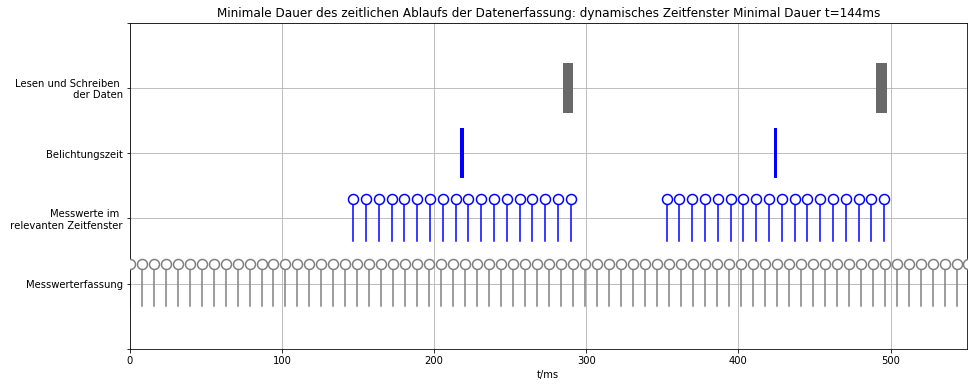

In [180]:
# Plot 
fig, ax = plt.subplots(figsize=(15,6))
i = 0
numberImages = 2
while i < 2:
    if i == 0:
        # Messwerterfassung
        x = np.linspace(0,1000,int(1000/measuredDataPerMs))
        (markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 1.3), linefmt='C7-', basefmt='None', bottom=0.65, markerfmt='wo')
        plt.setp(stemlines, linestyle="-", color="C7", linewidth=1.5)
        plt.setp(markers, markeredgecolor='C7', markersize=10, markeredgewidth=1.5, zorder=3)
        # Zeitfenster
        x = np.linspace(minStartMeasurementDataTime,minStartMeasurementDataTime+timeframe, 
                        int(minMeasuredDataPerMs))
        (markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 2.3), 'b-', basefmt='None', bottom=1.65, markerfmt='wo')
        plt.setp(stemlines, linestyle="-", color="b", linewidth=1.5)
        plt.setp(markers, markeredgecolor='b', markersize=10, markeredgewidth=1.5, zorder=3)
       # Belichtungszeit
        ax.hlines(xmin=minStartMeasurementDataTime + minExposureOffset,
                   xmax=(minStartMeasurementDataTime + minExposureOffset + minExposureTime ),
                   y=3, colors="blue", lw=50)
         # Lesen und schreiben der Daten
        ax.hlines(xmin=minStartMeasurementDataTime+timeframe+minStopMeasurementToEndTimeframeTime-minStopMeasurementTime,
                  xmax=minStartMeasurementDataTime+timeframe+minStopMeasurementToEndTimeframeTime-minStopMeasurementTime+minWriteTime,
              y=4, colors="dimgrey", lw=50)
    else:
         # Nächste Bildaufnahme
         # Lesen und schreiben der Daten
        ax.hlines(xmin=minCaptureImagesTime+minStartMeasurementDataTime+timeframe+minStopMeasurementToEndTimeframeTime-minStopMeasurementTime,
                  xmax=minCaptureImagesTime+minStartMeasurementDataTime+timeframe+minStopMeasurementToEndTimeframeTime-minStopMeasurementTime+minWriteTime,
              y=4, colors="dimgrey", lw=50)
        # Zeitfenster
        x = np.linspace(minStartMeasurementDataTime+minCaptureImagesTime,minCaptureImagesTime+minStartMeasurementDataTime+timeframe, 
                        int(minMeasuredDataPerMs))
        (markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 2.3), 'b-', basefmt='None', bottom=1.65, markerfmt='wo')
        plt.setp(stemlines, linestyle="-", color="b", linewidth=1.5)
        plt.setp(markers, markeredgecolor='b', markersize=10, markeredgewidth=1.5, zorder=3)
        # Belichtungszeit
        ax.hlines(xmin=minStartMeasurementDataTime + minExposureOffset+minCaptureImagesTime,
                   xmax=minStartMeasurementDataTime + minExposureOffset + minExposureTime+minCaptureImagesTime,
                   y=3, colors="blue", lw=50)
    i = i + 1
def formatter(y, pos):
    if y == 1:
        return 'Messwerterfassung'
    if y == 2:
        return 'Messwerte im \n relevanten Zeitfenster'
    if y == 3:
        return 'Belichtungszeit'
    if y == 4:
        return 'Lesen und Schreiben \n der Daten'
    else:
        return ''

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
plt.xlabel('t/ms')
plt.title('Minimale Dauer des zeitlichen Ablaufs der Datenerfassung: dynamisches Zeitfenster Minimal Dauer t=144ms')
plt.grid()
#plt.yticks(fontsize=11)
#plt.xticks(fontsize=11)
plt.xlim(0,550)
plt.ylim(0,5)
#plt.rcParams["legend.fontsize"] = 11
#plt.savefig('')

### Diagramm mit Maximalen Zeitwerten: Dynamisches Zeitfenster

In [181]:
# Minimalwert der Belichtungszeit aller Aufnahmen umgerechnet in ms
maxExposureTime = featuresDf['Belichtungszeit in ns'].max() / 1000000
maxExposureTime

29.996324000000001

In [182]:
# Dynamisches Zeitfenster Maximale Dauer
timeframe = featuresDf['Geschwindigkeit in km/h'].min() 
# umrechnung km/h in m/s
timeframe = timeframe/3.6
timeframe = 1/timeframe 
timeframe = timeframe * 1000
timeframe

719.42446043165478

In [183]:
# Mittelwert Anzahl der Messwerte
meanTimeframeTime = featuresDf['Geschwindigkeit in km/h'].mean() 
meanTimeframeTime = meanTimeframeTime/3.6
meanTimeframeTime = 1/meanTimeframeTime 
meanTimeframeTime = meanTimeframeTime * 1000
measuredDataPerMs = meanTimeframeTime / featuresDf['Anzahl der Messwerte'].mean()
measuredDataPerMs

7.7614322982775947

In [185]:
# Maximale Anzahl der Messwerte pro zeitfenster
maxMeasuredDataPointsTimeframe  = timeframe / measuredDataPerMs
maxMeasuredDataPointsTimeframe

92.69222906077637

In [70]:
# Maximalwerte vom Ende des Zeitfensters in ms bis zum Stop der Datenerfassung in ms 
maxStopMeasurementToEndTimeframeTime =(featuresDf['Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM'] 
                          - (featuresDf['Start des Zeitfensters in ns seit Start der JVM'] + ((1/(featuresDf['Geschwindigkeit in km/h']/3.6)) * 1000000000))).max()
maxStopMeasurementToEndTimeframeTime = maxStopMeasurementToEndTimeframeTime / 1000000
maxStopMeasurementToEndTimeframeTime

400.76113737499998

In [72]:
# Maximalwert vom Start der Messwert Datenerfassung bis zum Start des Zeitfensters in ms
maxStartMeasurementDataTime = (((featuresDf['Start des Zeitfensters in ns seit Start der JVM'] - featuresDf['Start der Messwerterfassung in ns seit Start der JVM'])/ 1000000))
maxStartMeasurementDataTime = maxStartMeasurementDataTime[maxStartMeasurementDataTime < 250]
maxStartMeasurementDataTime = maxStartMeasurementDataTime.max()
maxStartMeasurementDataTime

239.53086099999999

In [73]:
maxExposureOffset = (timeframe - maxExposureTime) / 2
maxExposureOffset

344.71406821582741

In [74]:
# maximale Dauer vom Aufruf das die Aufnahme fertig ist bis zum Stopp der Messwerterfassung in ms
maxStopMeasurementTime = (featuresDf['Zeitstempel Messwertdaten anfordern in Unixzeit'] - featuresDf['Zeitstempel in Unixzeit']).max()
maxStopMeasurementTime

406

In [75]:
# maximale Dauer von Lesen und Schreiben der Merkmale
maxWriteTime =  (featuresDf['Speicherzeitpunkt der Merkmale in Unixzeit'] - featuresDf['Zeitstempel in Unixzeit']).max()
maxWriteTime

432

In [82]:
maxCaptureImagesTime = 1000

(0, 5)

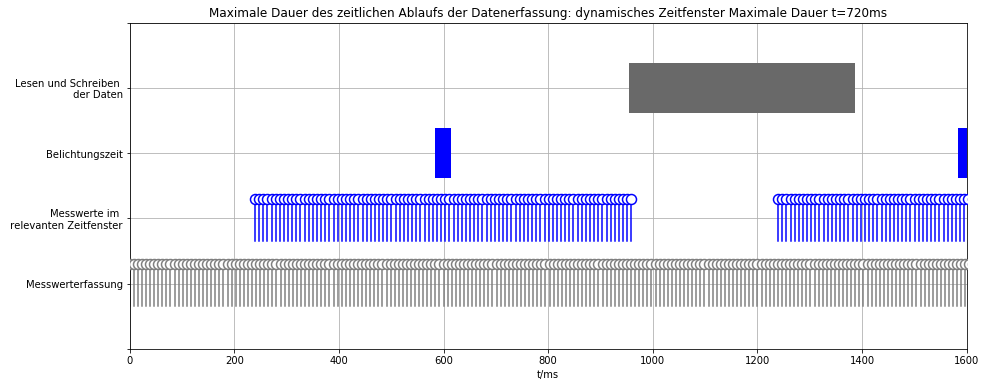

In [186]:
# Plot 
fig, ax = plt.subplots(figsize=(15,6))
i = 0
numberImages = 2
while i < 2:
    if i == 0:
        # Messwerterfassung
        x = np.linspace(0,3000,int(3000/measuredDataPerMs))
        (markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 1.3), linefmt='C7-', basefmt='None', bottom=0.65, markerfmt='wo')
        plt.setp(stemlines, linestyle="-", color="C7", linewidth=1.5)
        plt.setp(markers, markeredgecolor='C7', markersize=10, markeredgewidth=1.5, zorder=3)
        # Zeitfenster
        x = np.linspace(maxStartMeasurementDataTime,maxStartMeasurementDataTime+timeframe, 
                        int(maxMeasuredDataPointsTimeframe))
        (markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 2.3), 'b-', basefmt='None', bottom=1.65, markerfmt='wo')
        plt.setp(stemlines, linestyle="-", color="b", linewidth=1.5)
        plt.setp(markers, markeredgecolor='b', markersize=10, markeredgewidth=1.5, zorder=3)
       # Belichtungszeit
        ax.hlines(xmin=maxStartMeasurementDataTime + maxExposureOffset,
                   xmax=(maxStartMeasurementDataTime + maxExposureOffset + maxExposureTime ),
                   y=3, colors="blue", lw=50)
         # Lesen und schreiben der Daten
        ax.hlines(xmin=maxStartMeasurementDataTime+timeframe+maxStopMeasurementToEndTimeframeTime-maxStopMeasurementTime,
                  xmax=maxStartMeasurementDataTime+timeframe+maxStopMeasurementToEndTimeframeTime-maxStopMeasurementTime+maxWriteTime,
              y=4, colors="dimgrey", lw=50)
    else:
         # Nächste Bildaufnahme
         # Lesen und schreiben der Daten
        ax.hlines(xmin=maxCaptureImagesTime+maxStartMeasurementDataTime+timeframe+maxStopMeasurementToEndTimeframeTime-maxStopMeasurementTime,
                  xmax=maxCaptureImagesTime+maxStartMeasurementDataTime+timeframe+maxStopMeasurementToEndTimeframeTime-maxStopMeasurementTime+maxWriteTime,
              y=4, colors="dimgrey", lw=50)
        # Zeitfenster
        x = np.linspace(maxStartMeasurementDataTime+maxCaptureImagesTime,maxCaptureImagesTime+maxStartMeasurementDataTime+timeframe, 
                        int(maxMeasuredDataPointsTimeframe))
        (markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 2.3), 'b-', basefmt='None', bottom=1.65, markerfmt='wo')
        plt.setp(stemlines, linestyle="-", color="b", linewidth=1.5)
        plt.setp(markers, markeredgecolor='b', markersize=10, markeredgewidth=1.5, zorder=3)
        # Belichtungszeit
        ax.hlines(xmin=maxStartMeasurementDataTime + maxExposureOffset+maxCaptureImagesTime,
                   xmax=maxStartMeasurementDataTime + maxExposureOffset + maxExposureTime+maxCaptureImagesTime,
                   y=3, colors="blue", lw=50)
    i = i + 1
def formatter(y, pos):
    if y == 1:
        return 'Messwerterfassung'
    if y == 2:
        return 'Messwerte im \n relevanten Zeitfenster'
    if y == 3:
        return 'Belichtungszeit'
    if y == 4:
        return 'Lesen und Schreiben \n der Daten'
    else:
        return ''

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
plt.xlabel('t/ms')
plt.title('Maximale Dauer des zeitlichen Ablaufs der Datenerfassung: dynamisches Zeitfenster Maximale Dauer t=720ms')
plt.grid()
#plt.yticks(fontsize=11)
#plt.xticks(fontsize=11)
plt.xlim(0,1600)
plt.ylim(0,5)
#plt.rcParams["legend.fontsize"] = 11
#plt.savefig('')

### Diagramm mit tatsächlichen Zeitwerten mit dynamischen Zeitfenster 

In [12]:
imageIndex = 6

In [13]:
exposureTime = featuresDf['Belichtungszeit in ns'].iloc[imageIndex] / 1000000
exposureTimeNextImage = featuresDf['Belichtungszeit in ns'].iloc[imageIndex+1] / 1000000
exposureTime

2.0316230000000002

In [14]:
timeframe = featuresDf['Geschwindigkeit in km/h'].iloc[imageIndex]
timeframeNextImage = featuresDf['Geschwindigkeit in km/h'].iloc[imageIndex+1]
timeframeNextImage = timeframeNextImage/3.6
timeframeNextImage = 1/timeframeNextImage 
timeframeNextImage = timeframeNextImage * 1000
# umrechnung km/h in m/s
timeframe = timeframe/3.6
timeframe = 1/timeframe 
timeframe = timeframe * 1000
timeframe

323.62459546925572

In [15]:
meanTimeframeTime = featuresDf['Geschwindigkeit in km/h'].mean() 
meanTimeframeTime = meanTimeframeTime/3.6
meanTimeframeTime = 1/meanTimeframeTime 
meanTimeframeTime = meanTimeframeTime * 1000
measuredDataPerMs = meanTimeframeTime / featuresDf['Anzahl der Messwerte'].mean()
measuredDataPerMs

7.708335662948369

In [16]:
# Anzahl der Messwerte innerhalb des Zeitfensters
measuredDataPointsTimeframe = timeframe / measuredDataPerMs
measuredDataPointsTimeframeNextImage = timeframeNextImage / measuredDataPerMs

In [48]:
stopMeasurementToEndTimeframeTime =(featuresDf['Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM'] 
                          - (featuresDf['Start des Zeitfensters in ns seit Start der JVM'] + ((1/(featuresDf['Geschwindigkeit in km/h']/3.6)) * 1000000000))).iloc[imageIndex]
stopMeasurementToEndTimeframeTime = stopMeasurementToEndTimeframeTime / 1000000
stopMeasurementToEndTimeframeTimeNextImage =(featuresDf['Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM'] 
                          - (featuresDf['Start des Zeitfensters in ns seit Start der JVM'] + ((1/(featuresDf['Geschwindigkeit in km/h']/3.6)) * 1000000000))).iloc[imageIndex+1]
stopMeasurementToEndTimeframeTimeNextImage = stopMeasurementToEndTimeframeTimeNextImage / 1000000
stopMeasurementToEndTimeframeTime

18.193421000000001

In [49]:
startMeasurementDataTime = (((featuresDf['Start des Zeitfensters in ns seit Start der JVM'] - featuresDf['Start der Messwerterfassung in ns seit Start der JVM'])/ 1000000))
startMeasurementDataTime = startMeasurementDataTime[startMeasurementDataTime < 250]
startMeasurementDataTime = startMeasurementDataTime.mean()
startMeasurementDataTime

203.64453225

In [50]:
exposureOffset = (timeframe - exposureTime) / 2
exposureOffsetNextImage = (timeframeNextImage - exposureTimeNextImage) / 2
exposureOffset

194.99908049999999

In [51]:
stopMeasurementTime = (featuresDf['Zeitstempel Messwertdaten anfordern in Unixzeit'] - featuresDf['Zeitstempel in Unixzeit']).iloc[imageIndex]
stopMeasurementTimeNextImage = (featuresDf['Zeitstempel Messwertdaten anfordern in Unixzeit'] - featuresDf['Zeitstempel in Unixzeit']).iloc[imageIndex+1]
stopMeasurementTime

95

In [52]:
writeTime = (featuresDf['Speicherzeitpunkt der Merkmale in Unixzeit'] - featuresDf['Zeitstempel in Unixzeit']).iloc[imageIndex]
writeTimeNextImage = (featuresDf['Speicherzeitpunkt der Merkmale in Unixzeit'] - featuresDf['Zeitstempel in Unixzeit']).iloc[imageIndex+1]
writeTime

135

In [53]:
nextImageInMs = featuresDf['Zeitstempel in Unixzeit'].iloc[imageIndex+1] - featuresDf['Zeitstempel in Unixzeit'].iloc[imageIndex]
nextImageInMs

351

In [54]:
# In dieser Zelle wird ein Dataframe Index gesucht bei welchem sich zwei Zeitfenster überschneiden
indexOverlap = 0
for index, row in featuresDf.iterrows():
    indexOverlap = int(index)
    if indexOverlap+1 > featuresDf.shape[0]:
        break  
    # Start Zeitfenster plus Dauer des Zeitfensters in ns ist größer als Start des Zeitfensters für das nächste Bild
    if (featuresDf['Start des Zeitfensters in ns seit Start der JVM'].iloc[indexOverlap] + ((1/(featuresDf['Geschwindigkeit in km/h'].iloc[indexOverlap]/3.6)) * 1000000000)) > featuresDf['Start des Zeitfensters in ns seit Start der JVM'].iloc[indexOverlap+1]:
        print(indexOverlap)
        break

6


(0, 5)

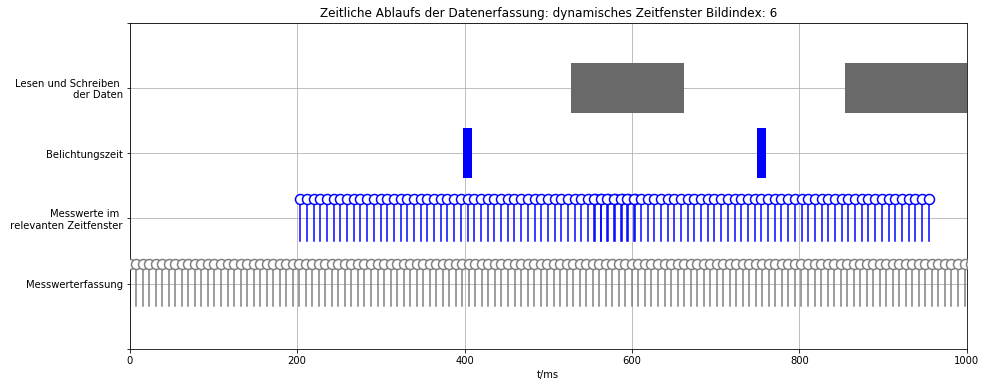

In [55]:
# Plot 
fig, ax = plt.subplots(figsize=(15,6))
i = 0
numberImages = 2
while i < 2:
    if i == 0:
        # Messwerterfassung
        x = np.linspace(0,3000,int(3000/measuredDataPerMs))
        (markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 1.3), linefmt='C7-', basefmt='None', bottom=0.65, markerfmt='wo')
        plt.setp(stemlines, linestyle="-", color="C7", linewidth=1.5)
        plt.setp(markers, markeredgecolor='C7', markersize=10, markeredgewidth=1.5, zorder=3)
        # Zeitfenster
        x = np.linspace(startMeasurementDataTime,startMeasurementDataTime+timeframe, 
                        int(measuredDataPointsTimeframe))
        (markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 2.3), 'b-', basefmt='None', bottom=1.65, markerfmt='wo')
        plt.setp(stemlines, linestyle="-", color="b", linewidth=1.5)
        plt.setp(markers, markeredgecolor='b', markersize=10, markeredgewidth=1.5, zorder=3)
       # Belichtungszeit
        ax.hlines(xmin=startMeasurementDataTime + exposureOffset,
                   xmax=(startMeasurementDataTime + exposureOffset + exposureTime ),
                   y=3, colors="blue", lw=50)
         # Lesen und schreiben der Daten
        ax.hlines(xmin=startMeasurementDataTime+timeframe+stopMeasurementToEndTimeframeTime-stopMeasurementTime,
                  xmax=startMeasurementDataTime+timeframe+stopMeasurementToEndTimeframeTime-stopMeasurementTime+writeTime,
              y=4, colors="dimgrey", lw=50)
    else:
         # Nächste Bildaufnahme
         # Lesen und schreiben der Daten
        ax.hlines(xmin=nextImageInMs+startMeasurementDataTime+timeframeNextImage+stopMeasurementToEndTimeframeTimeNextImage-stopMeasurementTimeNextImage,
                  xmax=nextImageInMs+startMeasurementDataTime+timeframeNextImage+stopMeasurementToEndTimeframeTimeNextImage-stopMeasurementTimeNextImage+writeTimeNextImage,
              y=4, colors="dimgrey", lw=50)
        # Zeitfenster
        x = np.linspace(nextImageInMs+startMeasurementDataTime,nextImageInMs+startMeasurementDataTime+timeframeNextImage, 
                        int(measuredDataPointsTimeframeNextImage))
        (markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 2.3), 'b-', basefmt='None', bottom=1.65, markerfmt='wo')
        plt.setp(stemlines, linestyle="-", color="b", linewidth=1.5)
        plt.setp(markers, markeredgecolor='b', markersize=10, markeredgewidth=1.5, zorder=3)
        # Belichtungszeit
        ax.hlines(xmin=nextImageInMs+startMeasurementDataTime + exposureOffsetNextImage,
                   xmax=nextImageInMs+startMeasurementDataTime + exposureOffsetNextImage + exposureTimeNextImage,
                   y=3, colors="blue", lw=50)
    i = i + 1
def formatter(y, pos):
    if y == 1:
        return 'Messwerterfassung'
    if y == 2:
        return 'Messwerte im \n relevanten Zeitfenster'
    if y == 3:
        return 'Belichtungszeit'
    if y == 4:
        return 'Lesen und Schreiben \n der Daten'
    else:
        return ''

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
plt.xlabel('t/ms')
plt.title('Zeitliche Ablaufs der Datenerfassung: dynamisches Zeitfenster Bildindex: ' + str(imageIndex))
plt.grid()
#plt.yticks(fontsize=11)
#plt.xticks(fontsize=11)
plt.xlim(0,1000)
plt.ylim(0,5)
#plt.rcParams["legend.fontsize"] = 11
#plt.savefig('')

### Diagramm mit Minimal Zeitwerten für ein statisches Zeitfenster

In [32]:
minExposureTime = featuresDf['Belichtungszeit in ns'].min() / 1000000
minExposureTime

2.2246730000000001

In [169]:
# Min Zeit vom Stopp des Zeitfensters zum Stopp der Messwerterfassung 
minStopMeasurementToEndTimeframeTime =(featuresDf['Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM'] 
                          - (featuresDf['Start des Zeitfensters in ns seit Start der JVM'] + (timeframe))).min()
minStopMeasurementToEndTimeframeTime = minStopMeasurementToEndTimeframeTime / 1000000
minStopMeasurementToEndTimeframeTime

26.202089000000001

In [170]:
minStopMeasurementTime = (featuresDf['Stopp der Messwerterfassung in Unixzeit']-featuresDf['Zeitstempel in Unixzeit'] ).min()
minStopMeasurementTime

-106.0

In [172]:
# vom Start der Messwert Datenerfassung bis zum Start des Zeitfensters in ms
minStartMeasurementDataTime = (featuresDf['Start des Zeitfensters in ns seit Start der JVM'] - featuresDf['Start der Messwerterfassung in ns seit Start der JVM']).min()
minStartMeasurementDataTime = minStartMeasurementDataTime / 1000000
minStartMeasurementDataTime

-71.199596

In [183]:
minStartMeasurementDataTimeOutlier = featuresDf[(featuresDf['Start des Zeitfensters in ns seit Start der JVM'] - featuresDf['Start der Messwerterfassung in ns seit Start der JVM']) < 0]
(minStartMeasurementDataTimeOutlier['Start des Zeitfensters in ns seit Start der JVM'] - minStartMeasurementDataTimeOutlier['Start der Messwerterfassung in ns seit Start der JVM']) / 1000000
featuresDf[(featuresDf['Start des Zeitfensters in ns seit Start der JVM'] - featuresDf['Start der Messwerterfassung in ns seit Start der JVM']) < 0].index

Int64Index([35516, 45468, 55901, 59990, 97012], dtype='int64')

In [184]:
minExposureOffset = (timeframe - minExposureTime) / 2
# Abstand zwischen zwei Bildern
meanCaptureImagesTime = meanCaptureImagesTime
# Messwerterfassung
startMinTimeFrame = meanCaptureImagesTime - minStopMeasurementToEndTimeframeTime - minStopMeasurementTime - timeframe
#Zeitfenster
startMinExposureTime = startMinTimeFrame + minExposureOffset
# Belichtungszeit
exposureMinTime = startMinExposureTime + minExposureTime

In [185]:
zeroOffsetMinMax = startMaxTimeFrame - maxStartMeasurementDataTime
zeroOffsetMinMax

-396.28152299999999

In [186]:
maxStartMeasurementDataTime

227.61094399999999

In [187]:
maxStopMeasurementTime

5.0

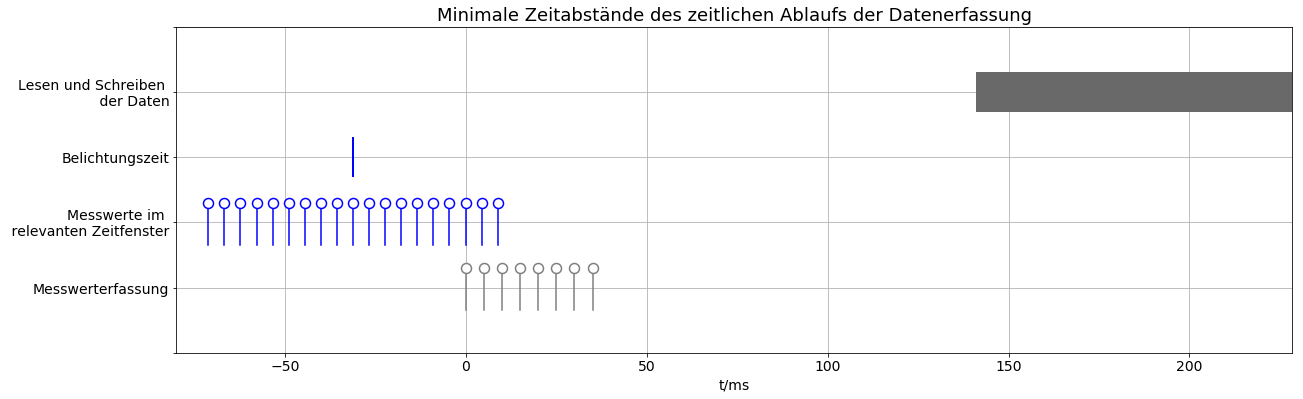

In [207]:
# Plot mit Min und Max Zeitangaben
fig, ax = plt.subplots(figsize=(20,6))
# Messwerterfassung
x = np.linspace(0,minStartMeasurementDataTime+timeframe+minStopMeasurementToEndTimeframeTime, 
                        int((minStartMeasurementDataTime+timeframe+minStopMeasurementToEndTimeframeTime)/measuredDataPerMs))
(markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 1.3), linefmt='C7-', basefmt='None', bottom=0.65, markerfmt='wo')
plt.setp(stemlines, linestyle="-", color="C7", linewidth=1.5)
plt.setp(markers, markeredgecolor='C7', markersize=10, markeredgewidth=1.5, zorder=3)
# Zeitfenster
x = np.linspace(minStartMeasurementDataTime,minStartMeasurementDataTime+timeframe, 
                int((timeframe)/ measuredDataPerMs))
(markers, stemlines, baseline) = plt.stem(x, np.full((x.size), 2.3), 'b-', basefmt='None', bottom=1.65, markerfmt='wo')
plt.setp(stemlines, linestyle="-", color="b", linewidth=1.5)
plt.setp(markers, markeredgecolor='b', markersize=10, markeredgewidth=1.5, zorder=3)
# Belichtungszeit
ax.hlines(xmin=(minStartMeasurementDataTime+timeframe/2) - (minExposureTime/2),xmax=(minStartMeasurementDataTime+timeframe/2) + (minExposureTime/2),y=3, colors="blue", lw=40)
# Lesen und schreiben der Daten
ax.hlines(xmin=minStartMeasurementDataTime+timeframe+minStopMeasurementToEndTimeframeTime-minStopMeasurementTime,xmax=meanCaptureImagesTime+meanStopMeasurementTime - zeroOffsetMinMax + 50,
                  y=4, colors="dimgrey", lw=40)

def formatter(y, pos):
    if y == 1:
        return 'Messwerterfassung'
    if y == 2:
        return 'Messwerte im \n relevanten Zeitfenster'
    if y == 3:
        return 'Belichtungszeit'
    if y == 4:
        return 'Lesen und Schreiben \n der Daten'
    else:
        return ''
    

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
plt.xlabel('t/ms',fontsize=14)
plt.title('Minimale Zeitabstände des zeitlichen Ablaufs der Datenerfassung',fontsize=18)
plt.grid()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(-80,startTimeFrameList[1]-200)
plt.ylim(0,5)
plt.rcParams["legend.fontsize"] = 14

In [197]:
(minStartMeasurementDataTime+timeframe/2)

-31.199596

In [74]:
meanCaptureImagesTimeList[0] + meanStopMeasurementTime - zeroOffset

215.97347183880814

In [77]:
meanCaptureImagesTimeList[0] + meanStopMeasurementTime - startTimeFrameList[0]-meanStartMeasurementDataTime

90.856761651308119